## Градиентный спуск
Уравнение 
$$
\nabla f(x^*)=0
$$
дает условие на глобальный минимум выпуклой функции $f$. Предположим, что мы нашли близкую к $x^*$ точку $x$, можно ли из $\nabla f(x)$ извлечь какую-нибудь информацию о $x^*$? К примеру в случае функции $f(x)=\|x-x^*\|^2$ градиент указывает в направлении, противоположном $x^*$, в осталных случаях это не так 

In [1]:
import matplotlib.pyplot as plt
#plt.rcParams["text.usetex"] = False
import numpy as np

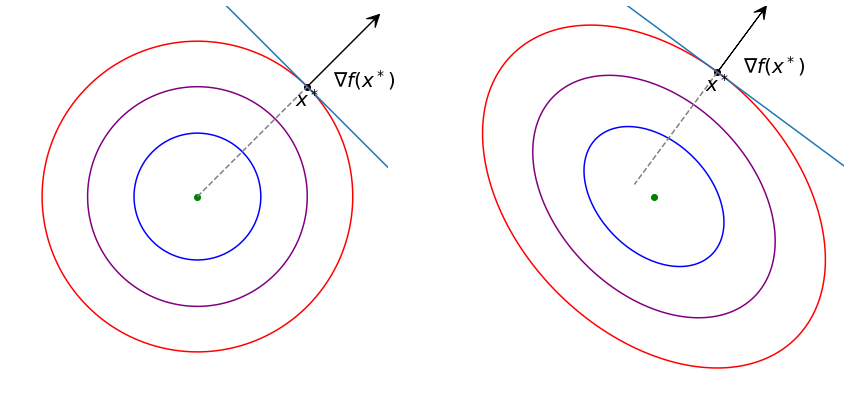

In [2]:
def show_gradients():
    f = lambda x: (x[0] - x[1]) ** 2 + (x[0] + x[1]) ** 2
    g = lambda x: 0.6 * (x[0] - x[1]) ** 2 + 1.3 * (x[0] + x[1]) ** 2
    grad_g = lambda x: (1.2 * (x[0] - x[1]) + 2.6 * (x[0] + x[1]),
                        -1.2 * (x[0] - x[1]) + 2.6 * (x[0] + x[1]))
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    
    axs[0].plot([0], [0], 'o', color='green')
    axs[1].plot([0], [0], 'o', color='green')
    
    for ax in axs:
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        for name, spine in ax.spines.items():
            spine.set_visible(False)
            spine.set_visible(False)
    
    #Level contours
    delta = 0.025
    x = np.arange(-2, 2, delta)
    y = np.arange(-2, 2, delta)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = f((X[i][j], Y[i][j]))
    CS = axs[0].contour(X, Y, Z, [0.5, 1.5, 3], colors=['blue', 'purple', 'red'])
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = g((X[i][j], Y[i][j]))
    CS = axs[1].contour(X, Y, Z, [0.5, 1.5, 3], colors=['blue', 'purple', 'red'])
    
    x = [0.75 ** 0.5, 0.75 ** 0.5]
    axs[0].scatter([x[0]], [x[1]], color='black')
    axs[0].arrow(x[0], x[1], 0.5,  0.5, head_width=0.1, head_length=0.1, 
             overhang=0.5, fc='k', ec='k', color='blue')
    axs[0].text(x[0] + 0.2, x[1], r"$\nabla f(x^*)$", fontsize=20)
    axs[0].text(x[0] - 0.1, x[1]-0.15, r"$x^*$", fontsize=20)
    axs[0].plot([x[0] - 0.7, x[0] + 0.7], [x[1] + 0.7, x[1] - 0.7])
    axs[0].plot([0, x[0]], [0, x[1]], linestyle='--', color='grey')
    
    r = np.arange(0, 3, 0.01)
    _, x = min([(abs(g([0.5,  y]) - 3), [0.5, y]) for y in r])
    dx, dy = grad_g(x)
    axs[1].scatter([x[0]], [x[1]], color='black')
    axs[1].arrow(x[0], x[1], dx * 0.1, dy * 0.1, head_width=0.1, head_length=0.1, 
             overhang=0.5, fc='k', ec='k', color='blue')
    axs[1].text(x[0] + 0.2, x[1], r"$\nabla f(x^*)$", fontsize=20)
    axs[1].text(x[0] - 0.1, x[1]-0.15, r"$x^*$", fontsize=20)
    axs[1].plot([x[0] - dy, x[0] + dy], [x[1] + dx, x[1] - dx])
    axs[1].plot([x[0], x[0] - dx * 0.2], [x[1], x[1] - dy * 0.2], linestyle='--', color='grey')
    
    plt.close(fig)   
    
    return fig

show_gradients()

Так или иначе взяв $x^+=x-\alpha\nabla f(x)$ получаем
$$
\begin{array}{rl}
f(x^+)&=f(x)-\nabla f(x)^T(x^+-x)+o(\|x^+-x\|) \\
&=f(x)-\alpha\|\nabla f(x)\|^2+o(\alpha\|\nabla f(x)\|) \\
&\leq f(x)
\end{array}
$$
при достаточно малом $\alpha$. Таким образом знание градиента может помочь нам если не решить оптимизационную задачу, то по крайней мере найти точку, значение которой меньше, чем в исходной. Повторив этот процесс несколько раз мы приходим к последовательности вида
$$
x_{k+1}=x_k-\alpha_k\nabla f(x_k), \tag{1}
$$
которую принято называть <i>градиентным спуском</i>. Величину $\alpha_k$ принято называть <i>размером шага</i> (stepsize) на шаге $k$ (в машинном обучении аналогичную величину принято называть скоростью обучения/learning rate). Для выпуклых функций условие $\nabla f(x^*)=0$ является достаточным условием минимума, поэтому если для последовательности (1) выполняется $\nabla f(x_k)\rightarrow 0$, то последовательность сходится к точке минимума. Довольно очевидным являетя то, что если $\alpha_k=\alpha$ и $x_k\rightarrow x^*$, то
$$
x_{k+1}-x_k=\alpha\nabla f(x_k)\rightarrow 0.
$$
Чуть сложнее показать, что аналогичное выполняется в случае
$$
\sum_{k=0}^\infty \alpha_k=\infty.
$$
Остается при этом вопрос о том, сходится ли последовательность, и если сходится, то насколько быстро?

In [3]:
from interactive_visualization.animation_utils import animate_list

In [4]:
def plot_trajectory(func, traj, limit_point=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])    
    
    if limit_point:
        ax.plot([limit_point[0]], [limit_point[1]], 'o', color='green')
    #Level contours
    delta = 0.025
    x = np.arange(-2, 2, delta)
    y = np.arange(-2, 2, delta)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i][j] = func([X[i][j], Y[i][j]])
    CS = ax.contour(X, Y, Z, [0.5, 1.5, 3], colors=['blue', 'purple', 'red'])
    ax.plot([u[0] for u in traj], [u[1] for u in traj], color='black')
    ax.plot([u[0] for u in traj], [u[1] for u in traj], 'o', color='black')
    
    plt.close(fig)
    return fig

x, y = (0.3, 1.2)
num_iters = 12
trajectory = [(x, y)]
alpha = 0.1
g = lambda x: 0.6 * (x[0] - x[1]) ** 2 + 1.3 * (x[0] + x[1]) ** 2
grad_g = lambda x: (1.2 * (x[0] - x[1]) + 2.6 * (x[0] + x[1]),
                    -1.2 * (x[0] - x[1]) + 2.6 * (x[0] + x[1]))
plots = [plot_trajectory(g, trajectory, limit_point=(0, 0))]
# Итерируемся и сохраняем текущий путь на каждом шаге
for i in range(num_iters):
    dx, dy = grad_g([x, y])
    x, y = x - alpha * dx, y - alpha * dy
    trajectory.append((x, y))
    plots.append(plot_trajectory(g, trajectory, limit_point=(0, 0)))

animate_list(plots, play=True, interval=400);

interactive(children=(IntSlider(value=0, description='step', max=12), Output()), _dom_classes=('widget-interac…

## Анализ для выпуклых функций
Оказывается, что в общем виде для выпуклых функций сходимость градиентного спуска относительно медленная.

<b> Теорема (О скорости сходимости градиентного спуска для выпуклых функций).</b> 
Пусть $f$ выпукла и дифференцируема на $\mathcal{D}$, градиент $f$ липшицев с константой $M>0$ на $S_f(x_0)$, $f$ ограничена снизу,
существует хотя бы одна точка минимума $x^*$, $\alpha_k=\alpha\in [0, 1/M]$,
тогда для последовательности $x_k$, генерируемой по правилу (1)  $f(x_k)$ убывает, более того
$$
f(x_k)-f(x^*)\leq \frac{1}{2\alpha k}||x_0-x^*||^2.
$$
<b>Доказательство</b>.
Используя непрерывность по Липшицу и $x_{k+1}-x_k=-\alpha \nabla f(x_k)$
\begin{align*}
f(x_{k+1})-f(x_k)&\leq \nabla f(x_k)^T(x_{k+1}-x_k)+\frac{M}{2}||x_{k+1}-x_k||^2\\
&=-\alpha\left(1-\frac{\alpha M}{2}\right)||\nabla f(x_k)||^2
\end{align*}
Таким образом $f(x_k)$ убывает в силу $0<\alpha<2/M$, что гарантирует $x_k\in S_f(x_0)$. С другой стороны
$$
f(x_k)-f(x^*)\geq f(x_k)-f(x_{k+1})\geq \alpha\left(1-\frac{\alpha M}{2}\right)||\nabla f(x_k)||^2.
$$
Так как это неравенство выполняется при любом $\alpha\in(0, 2/M)$ и любом $x_k$, то минимизируя по $\alpha$ (минимум при $\alpha=1/M$) получаем
$$
f(x)-f(x^*)\geq \frac{1}{2M}||\nabla f(x)||^2 \tag{2}
$$
Вернемся на шаг назад, при условии $\alpha\leq 1/M$ выполняется $-\alpha+M\alpha^2/2\leq -\alpha/2$, получаем
\begin{align*}
f(x_{i+1}) & \leq f(x_i)-\alpha\left(1-\frac{\alpha M}{2}\right)||\nabla f(x_i)||^2 \\
& \leq f(x_i)-\frac{\alpha}{2}||\nabla f(x_i)||^2 \\
& \leq f(x^*)+\nabla f(x_i)^T(x_i-x^*)-\frac{\alpha}{2}||\nabla f(x_i)||^2 \\
& =f(x^*)+\frac{1}{2\alpha}\left(||x_i-x^*||^2-||x_i-x^*-\alpha \nabla f(x_i)||^2\right) \\
&=
f(x^*)+\frac{1}{2\alpha}\left(||x_i-x^*||^2-||x_{i+1}-x^*||^2\right).
\end{align*}
Суммируя по $i=0\ldots k-1$ получаем
\begin{align*}
\sum_{i=1}^k(f(x_i)-f(x^*)) & \leq \frac{1}{2\alpha}
\sum_{i=1}^k\left(||x_{i-1}-x^*||^2-||x_i-x^*||^2\right)\\
& =\frac{1}{2\alpha}\left(||x_0-x^*||^2-||x_k-x^*||^2\right)\leq \frac{1}{2\alpha}||x_0-x^*||^2. 
\end{align*}
Так как $f(x_k)$ убывает, то
$$
f(x_k)-f(x^*)\leq \frac{1}{k}\sum_{i=1}^k(f(x_i)-f(x^*))\leq \frac{1}{2\alpha k}||x_0-x^*||^2.~\#
$$

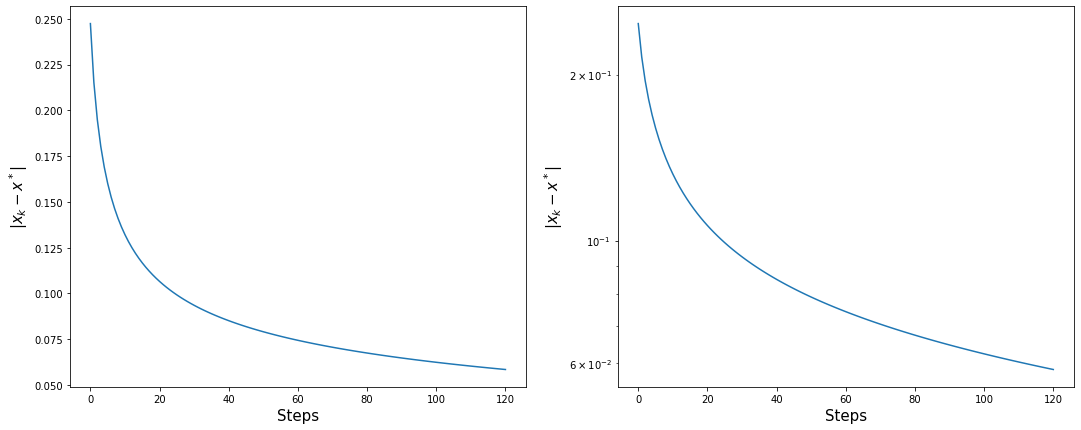

In [5]:
def show_convex_case():
    f = lambda x: x[0] ** 4 + 2 * x[1] ** 4
    grad_f = lambda x: np.array([4 * x[0] ** 3, 8 * x[1] ** 3])
    x = np.array([0.3, 1.2]) * 0.2
    num_iters = 120
    alpha = 0.3
    dists = [np.linalg.norm(np.array(x))]
    for i in range(num_iters):
        dx = grad_f(x)
        x = x - alpha * dx
        dists.append(np.linalg.norm(x))
        
    fig, axs = plt.subplots(1, 2, figsize=(18, 7))
    
    axs[0].plot([i for i in range(num_iters + 1)], [dists[i] for i in range(num_iters + 1)])
    axs[0].set_xlabel('Steps', fontsize=15)
    axs[0].set_ylabel('$\|x_k-x^*\|$', fontsize=15)
    
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Steps', fontsize=15)
    axs[1].set_ylabel('$\|x_k-x^*\|$', fontsize=15)
    axs[1].plot([i for i in range(num_iters + 1)], [dists[i] for i in range(num_iters + 1)])
    
    plt.close(fig)
    return fig

show_convex_case()

## Анализ для случая сильной выпуклости 
Для случая сильно-выпуклой функции удается получить линейную сходимость.

<b>Лемма (о сильно $m-$выпуклой функции $M$-гладкой функции)</b>. Пусть $f:\mathcal{D}\rightarrow \mathbb{R}$ - сильно выпуклая c параметром $m$ функция, $\nabla f$ удовлетворяет условию
Липшица с параметром $M$, т. е.
$$
m||y-x||^2\leq (\nabla f(y)-\nabla f(x))^T(y-x)\leq M||y-x||^2,
$$
тогда для $f$ выполняется
$$
(\nabla f(y)-\nabla f(x))^T(y-x)\geq \frac{mM}{m+M}||y-x||^2+\frac{1}{m+M}||\nabla f(y)-\nabla f(x)||^2
$$
<b>Доказательство</b>. Рассмотрим функцию $g(x)=f(x)-\frac{m}{2}||x||^2$. Заметим, что $\nabla g(x)=\nabla f(x)-mx$ и
$$
(\nabla g(y)-\nabla g(x))^T(y-x)=(\nabla f(y)-\nabla f(x))^T(y-x)-m||y-x||^2,
$$
то есть $g$ - выпуклая функция, $\nabla g$ удовлетворяет условию Липшица с константой $M-m$.

Далее, пусть для некоторого $x$ $\phi(y)=g(y)-\nabla g(x)^Ty$. Заметим, что $\nabla \phi(y)=\nabla g(y)-\nabla g(x)$, таким
образом $\phi$ тоже выпукла и $\nabla \phi$ удовлетворяет условию Липшица с константов $M-m$.

Точка $x$ минимизирует $\phi$ в силу выпуклости $\phi$ и $\nabla \phi(x)=0$, используя (2)
$$
\phi(x)\leq \phi(y)-\frac{1}{2(M-m)}||\nabla \phi(y)||^2
$$
что имеет следующий вид в терминах $g$
$$
g(y)\geq g(x)+\nabla g(x)^T(y-x)+\frac{1}{2(M-m)}||\nabla g(y)-\nabla g(x)||^2
$$
складывая это неравенство с самим собой с переставленными $x\leftrightarrow y$ получаем
$$
(\nabla g(y)-\nabla g(x))^T(y-x)\geq \frac{1}{M-m}||\nabla g(y)-\nabla g(x)||^2
$$

Наконец, выражая $g$ через $f$ получаем
\begin{align*}
(\nabla g(y)-\nabla g(x))^T(y-x)&=(\nabla f(y)-\nabla f(x))^T(y-x)-m||y-x||^2\\
||\nabla g(y)-\nabla g(x)||^2&=||\nabla f(y)-\nabla f(x)||^2-2m(\nabla f(y)-\nabla f(x))^T(y-x)\\
&~~~+m^2||y-x||^2,
\end{align*}

что дает
$$
\begin{array}{rl}
(\nabla f(y)-\nabla f(x))^T(y-x)&\geq m||y-x||^2+\frac{1}{M-m}(||\nabla f(y)-\nabla f(x)||^2\\
&~~~-2m(\nabla f(y)-\nabla f(x))^T(y-x)+m^2||y-x||^2)\\
&\geq \frac{1}{m+M}(Mm||y-x||^2+||\nabla f(y)-\nabla f(x)||^2)~~\#
\end{array}
$$

<b> Теорема (о сходимости градиентного спуска для сильно выпуклой функции). </b> Пусть $f$ дифференцируема на $\mathcal{D}$, $\alpha_k\equiv \alpha\in (0, 2/(M+m))$, $f$ сильно выпукла с константой $m>0$ на 
$\bar{B}(x^*, ||x_0-x^*||)$, градиент $f$ липшицев с константой $M\geq m$ на $\bar{B}(x^*, ||x_0-x^*||)$, тогда для последовательности $x_k$, генерируемой по правилу (1),
$x_k$ cходится к единственной точке минимума $x^*$ $f$ на $\mathcal{D}$, более того для 
$$
||x_k-x^*||^2\leq \left(1-\frac{2\alpha mM}{M+m}\right)^k||x_0-x^*||^2
$$
<b>Доказательство.</b> Используя доказанную лемму
$$
\begin{array}{rl}
||x_{k+1}-x^*||^2&=||x_k-x^*||^2-2\alpha\nabla f(x_k)(x_k-x^*)+\alpha^2||\nabla f(x_k)||^2\\
&\leq \left(1-\frac{2\alpha mM}{M+m}\right)||x_k-x^*||^2+\alpha\left(\alpha-\frac{2}{m+M}\right)||\nabla f(x_k)||^2\\
&\leq \left(1-\frac{2\alpha mM}{M+m}\right)||x_k-x^*||^2
\end{array}
$$

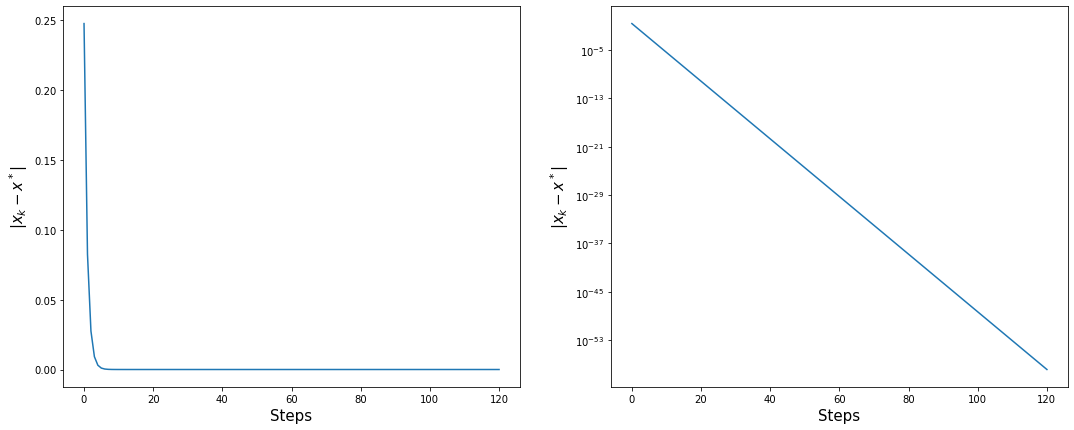

In [6]:
def show_strong_convex_case():
    f = lambda x: x[0] ** 2 + 2 * x[1] ** 2
    grad_f = lambda x: np.array([2 * x[0], 4 * x[1]])
    x = np.array([0.3, 1.2]) * 0.2
    num_iters = 120
    alpha = 2.0 / 6
    dists = [np.linalg.norm(np.array(x))]
    for i in range(num_iters):
        dx = grad_f(x)
        x = x - alpha * dx
        dists.append(np.linalg.norm(x))
        
    fig, axs = plt.subplots(1, 2, figsize=(18, 7))
    
    axs[0].plot([i for i in range(num_iters + 1)], [dists[i] for i in range(num_iters + 1)])
    axs[0].set_xlabel('Steps', fontsize=15)
    axs[0].set_ylabel('$\|x_k-x^*\|$', fontsize=15)
    
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Steps', fontsize=15)
    axs[1].set_ylabel('$\|x_k-x^*\|$', fontsize=15)
    axs[1].plot([i for i in range(num_iters + 1)], [dists[i] for i in range(num_iters + 1)])
    
    plt.close(fig)
    return fig

show_strong_convex_case()

<i>Замечание</i>. При $\alpha=2/(m+M)$ параметр сходимости становится
$$
1-\frac{2\alpha mM}{M+m}=1-\frac{4 mM}{(M+m)^2}=\left(\frac{M-m}{M+m}\right)^2
$$
Такой выбор $\alpha$ оптимален при условии, что $m, M$ -- точные оценки: пусть $f(x)=\frac{1}{2}x^TAx-b^Tx$, $A=A^T$, тогда 
последовательность (1) принимает вид
$$
x_{k+1}=(I-\alpha A)x_k+\alpha b.
$$
Если  $Ax^*=b$, $m, M>0$ -- минимальное и максимальное собственные числа $A$, то
$$
||x_{k+1}-x^*||=||(I-\alpha A)(x_k-x^*)||\leq \max\{|1-\alpha M|, |1-\alpha m|\} ||x_k-x^*||,
$$
при этом
$$
 \min_\alpha\max\{|1-\alpha M|, |1-\alpha m|\}=\frac{M-m}{M+m},
$$
минимум достигается при $\alpha=2/(m+M)$.

## Источники
[<i>Нестеров Ю. Е.</i> Методы выпуклой оптимизации](http://premolab.ru/pub_files/pub5/MnexoB89z7.pdf) // парагафы 1.2.3 и 2.1.5

[<i>Boyd S., Vandenberghe L.</i> Convex optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf) // парагаф 9.3

[<i>Поляк Б. Т.</i> Введение в оптимизацию](http://lab7.ipu.ru/files/polyak/polyak-optimizationintro.pdf) // парагаф 1.4

[<i>Vandenberghe L.</i> Лекция по градиентному спуску](http://www.seas.ucla.edu/~vandenbe/236C/lectures/gradient.pdf)